In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os
from pandas import datetime
import statsmodels.api as sm
import seaborn as sns

<ipython-input-1-04b246002f43>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


###Getting values of 6 considered stocks

In [ ]:
tickers = ['KO', 'PEP', 'TSLA','AAPL', 'WMT', 'TGT']
price = yf.download(tickers, '2012-01-01', '2022-12-31')['Adj Close']
price.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,KO,PEP,TGT,TSLA,WMT
Date,,,,,,
2012-01-03,12.433825,23.948851,46.588127,36.457100,1.872000,15.429741
2012-01-04,12.500649,23.798618,46.826675,35.658363,1.847333,15.271174
2012-01-05,12.639425,23.685942,46.461826,34.595737,1.808000,15.197011
2012-01-06,12.771562,23.535698,45.879486,34.909523,1.794000,15.089587
2012-01-09,12.751300,23.535698,46.118031,34.638531,1.816667,15.135621
2012-01-10,12.796957,23.675695,46.068913,34.795433,1.841333,15.099821
2012-01-11,12.776097,23.238655,45.612869,34.966587,1.882000,15.191887
2012-01-12,12.741018,23.071339,45.339222,35.522869,1.883333,15.217466
2012-01-13,12.693243,22.873306,45.184864,35.529987,1.519333,15.227695


Create dataframe including adjusted close price for 6 stocks

In [ ]:
last_prices = price.tail(1)
print(last_prices)

Ticker            AAPL         KO         PEP         TGT    TSLA        WMT
Date                                                                        
2022-12-30  129.043121  61.175209  174.288437  143.307846  123.18  46.395256


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2012-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2768 non-null   float64
 1   KO      2768 non-null   float64
 2   PEP     2768 non-null   float64
 3   TGT     2768 non-null   float64
 4   TSLA    2768 non-null   float64
 5   WMT     2768 non-null   float64
dtypes: float64(6)
memory usage: 151.4 KB


In [ ]:
price.describe()

Ticker,AAPL,KO,PEP,TGT,TSLA,WMT
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,56.360816,38.059540,96.027216,87.434085,66.687498,28.569553
std,48.238500,9.826924,34.162317,56.165525,99.362267,10.475002
min,11.982236,22.873306,43.978069,34.595737,1.519333,14.768344
25%,21.805665,30.265434,70.832384,48.050815,13.505834,20.189722
50%,35.585131,35.714422,91.236790,61.504164,17.396334,23.620903
75%,75.359324,45.103617,120.591152,108.902763,49.939668,37.455720
max,179.724564,62.319359,179.343613,250.836975,409.970001,51.700851


In [ ]:


# Kiểm tra giá trị NaN
has_nan = price.isnull().values.any()

# Kiểm tra giá trị 0
has_zero = (price == 0).values.any()

if has_nan:
    print("price chứa giá trị NaN")
else:
    print("price không chứa giá trị NaN")

if has_zero:
    print("price chứa giá trị 0")
else:
    print("price không chứa giá trị 0")

price không chứa giá trị NaN
price không chứa giá trị 0


###Basic plots

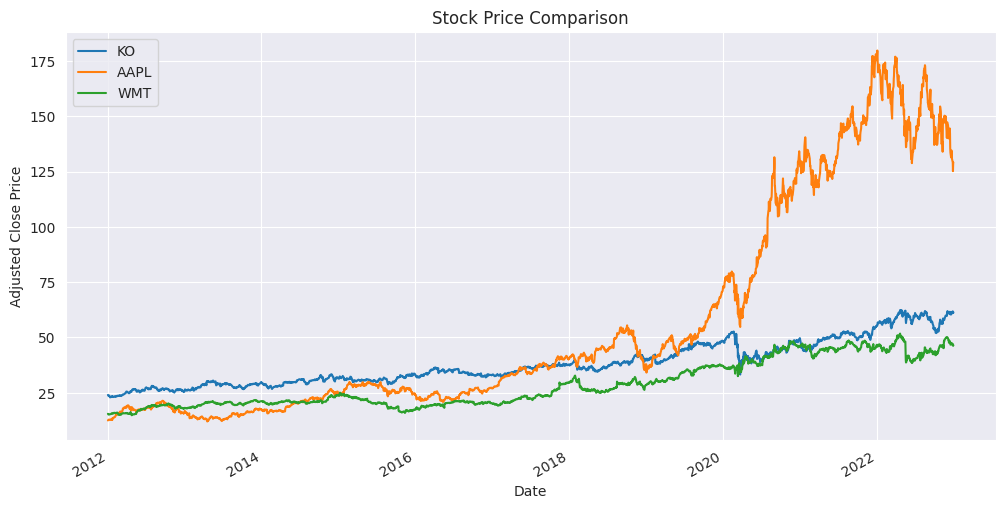

In [ ]:

# Chọn 3 cổ phiếu ngẫu nhiên từ danh sách
selected_tickers = ['KO', 'AAPL', 'WMT']  # Chọn 3 cổ phiếu bất kỳ từ danh sách

# Lấy dữ liệu giá đóng cửa của các cổ phiếu được chọn
selected_price = price[selected_tickers]

# Vẽ biểu đồ
sns.set_style("darkgrid")
selected_price.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Price Comparison")
plt.legend(loc="upper left")
plt.show()

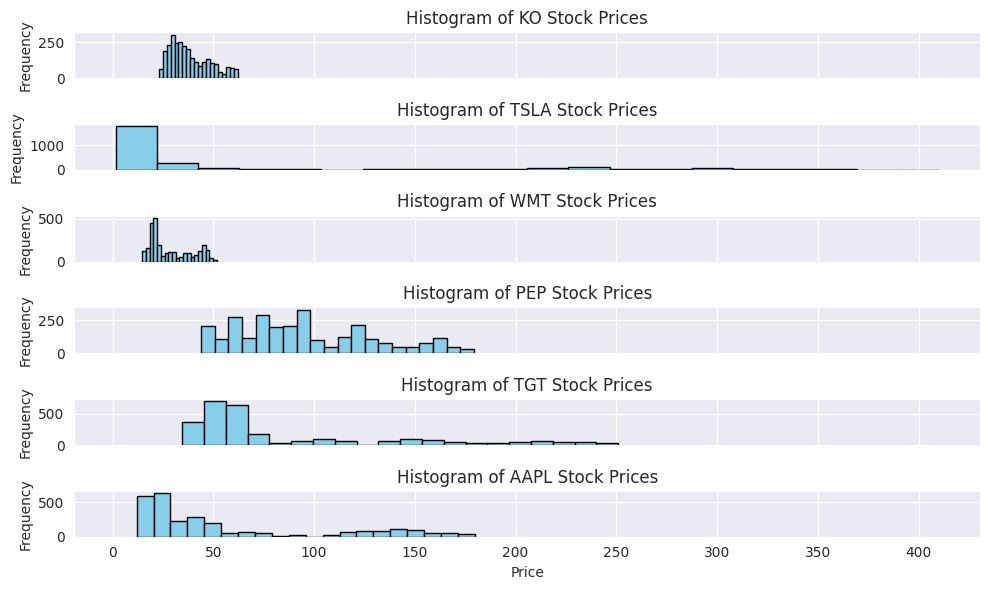

In [ ]:
import matplotlib.pyplot as plt

# Chọn 3 cổ phiếu từ danh sách
selected_tickers = ['KO', 'TSLA', 'WMT','PEP', 'TGT', 'AAPL']

# Tạo các subplot riêng biệt cho mỗi công ty
fig, axes = plt.subplots(len(selected_tickers), 1, figsize=(10, 6), sharex=True)

# Vẽ biểu đồ histogram cho từng công ty
for i, ticker in enumerate(selected_tickers):
    stock_prices = price[ticker]
    ax = axes[i]
    ax.hist(stock_prices, bins=20, color='skyblue', edgecolor='black')
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {ticker} Stock Prices")

# Đặt nhãn trục x cho subplot cuối cùng
axes[-1].set_xlabel("Price")

# Tự động điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

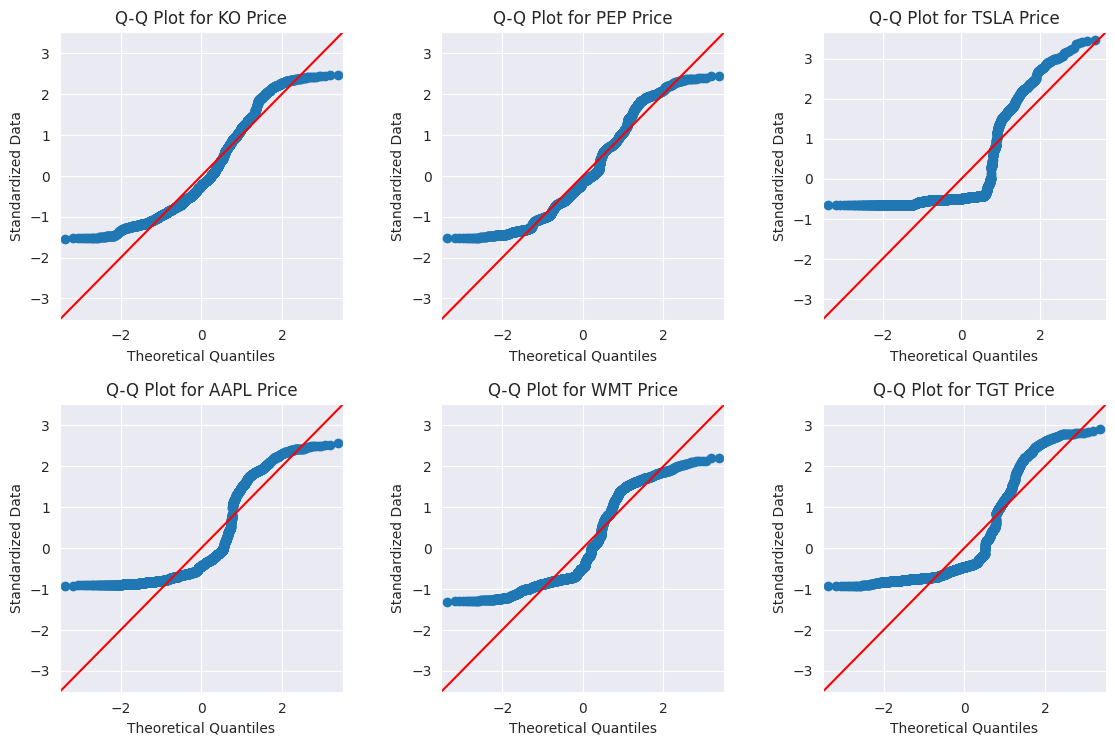

In [ ]:


# Tạo danh sách ticker
tickers = ['KO', 'PEP', 'TSLA', 'AAPL', 'WMT', 'TGT']

# Tính toán số hàng và số cột cho lưới
num_rows = 2
num_cols = 3

# Tạo lưới các subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=4)

# Vẽ biểu đồ QQ cho từng công ty
for i, ticker in enumerate(tickers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Lấy dữ liệu giá cho ticker hiện tại
    data = price[ticker].dropna()

    # Chuẩn hóa dữ liệu và tính toán quantile của phân phối chuẩn
    standardized_data = (data - np.mean(data)) / np.std(data)
    theoretical_quantiles = sm.ProbPlot(standardized_data).theoretical_quantiles

    # Vẽ biểu đồ QQ
    sm.qqplot(standardized_data, line='45', ax=ax)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Data')
    ax.set_title(f'Q-Q Plot for {ticker} Price')

# Hiển thị biểu đồ
plt.show()

#Calculate the financial index of 6 stocks company

###Total Assets, Total Liabilities, and Total Equity of each company

KO (2022): total assets: 92,763 (billion); total Liabilities: 92,763; total equity:
25,826
Net income: 9542


PEP: total assets: 92,187; total Liabilities: 92,187; total equity: 17,273; Net income: 8910

AAPL: total assets: 352,755; total Liabilities: 352,755; total equity: 50,672;
Net income: 99803

TSLA: total assets: 82,338; total Liabilities: 82,338; total equity: 45,898;
Net income: 12583

TGT: total assets: 53,811; total Liabilities: 53,811; total equity: 12,827;
Net income:6946


WMT: total assets: 244,860; total Liabilities: 244,860; total equity: 91,891;
Net income: 13673

In [ ]:
aapl = yf.Ticker('AAPL')
aapl.get_financials()

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147,0.162,0.133,0.144
NormalizedEBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
EBIT,117669000000.0,122034000000.0,111852000000.0,69964000000.0
NetInterestIncome,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,3933000000.0,2931000000.0,2645000000.0,2873000000.0


###Report on 6 stocks

In [ ]:
import pandas as pd

def calculate_ratios(statement, eps_key):
    statement["Debt-to-Equity Ratio (D/E)"] = statement["Total Liabilities"] / statement["Total Equity"]
    statement["Return on Assets (ROA)"] = statement["Net Income"] / statement["Total Assets"]
    statement["Return on Equity (ROE)"] = statement["Net Income"] / statement["Total Equity"]
    statement["EPS Growth"] = ((statement[eps_key + " 2021"] - statement[eps_key + " 2020"]) / statement[eps_key + " 2020"]) * 100
    return statement

def create_financial_statement(*companies):
    statements = []

    for company in companies:
        statement = pd.DataFrame({
            "Total Assets": company["Total Assets"],
            "Total Liabilities": company["Total Liabilities"],
            "Total Equity": company["Total Equity"],
            "Net Income": company["Net Income"],
            "EPS 2020": company["EPS 2020"],
            "EPS 2021": company["EPS 2021"]
        })

        statement = calculate_ratios(statement, "EPS")
        statements.append(statement)

    return statements








In [ ]:
# Define the companies' data
coca = {
    "Total Assets": [92763],
    "Total Liabilities": [92763],
    "Total Equity": [24860],
    "Net Income": [9542],
    "EPS 2020": [1.79],
    "EPS 2021": [2.25],
}

pepsi = {
    "Total Assets": [92187],
    "Total Liabilities": [92187],
    "Total Equity": [17273],
    "Net Income": [8910],
    "EPS 2020": [5.14],
    "EPS 2021": [5.49],
}

apple = {
    "Total Assets": [352755],
    "Total Liabilities": [352755],
    "Total Equity": [50672],
    "Net Income": [99803],
    "EPS 2020": [3.28],
    "EPS 2021": [5.61],
}

tesla = {
    "Total Assets": [82338],
    "Total Liabilities": [82338],
    "Total Equity": [45898],
    "Net Income": [12583],
    "EPS 2020": [0.21],
    "EPS 2021": [1.63],
}

tgt = {
    "Total Assets": [53811],
    "Total Liabilities": [53811],
    "Total Equity": [12827],
    "Net Income": [6946],
    "EPS 2020": [6.36],
    "EPS 2021": [8.64],
}

wmt = {
    "Total Assets": [244860],
    "Total Liabilities": [244860],
    "Total Equity": [91891],
    "Net Income": [13673],
    "EPS 2020": [1.73],
    "EPS 2021": [1.58],
}

In [ ]:
# Creating financial reports for 6 stocks
coca_statement, pepsi_statement, apple_statement, tesla_statement, tgt_statement, wmt_statement = create_financial_statement(
    coca, pepsi, apple, tesla, tgt, wmt
)

NameError: name 'coca' is not defined

In [ ]:
# Print the financial statements
print("KO:")
print(coca_statement)
print()

print("PEP:")
print(pepsi_statement)
print()

print("AAPL:")
print(apple_statement)
print()

print("TSLA:")
print(tesla_statement)
print()

print("TGT:")
print(tgt_statement)
print()

print("WMT:")
print(wmt_statement)

In [ ]:
import pandas as pd

# Creating financial reports for 6 stocks
coca_statement, pepsi_statement, apple_statement, tesla_statement, tgt_statement, wmt_statement = create_financial_statement(
    coca, pepsi, apple, tesla, tgt, wmt)

# Create Excel writer objects for each statement
coca_writer = pd.ExcelWriter('coca_statement.xlsx')
pepsi_writer = pd.ExcelWriter('pepsi_statement.xlsx')
apple_writer = pd.ExcelWriter('apple_statement.xlsx')
tesla_writer = pd.ExcelWriter('tesla_statement.xlsx')
tgt_writer = pd.ExcelWriter('tgt_statement.xlsx')
wmt_writer = pd.ExcelWriter('wmt_statement.xlsx')

# Write each statement to a separate worksheet in the respective Excel file
coca_statement.to_excel(coca_writer, sheet_name='Coca')
pepsi_statement.to_excel(pepsi_writer, sheet_name='Pepsi')
apple_statement.to_excel(apple_writer, sheet_name='Apple')
tesla_statement.to_excel(tesla_writer, sheet_name='Tesla')
tgt_statement.to_excel(tgt_writer, sheet_name='TGT')
wmt_statement.to_excel(wmt_writer, sheet_name='WMT')

# Save the Excel files
coca_writer.save()
pepsi_writer.save()
apple_writer.save()
tesla_writer.save()
tgt_writer.save()
wmt_writer.save()

###Quantity of each

In [ ]:
investment_amount = 10000000  # Số tiền đầu tư 10 triệu đô-la

In [ ]:
# Tính số lượng cổ phiếu cho từng loại cổ phiếu
ko_pep_wmt_tgt_price = [23.948854, 46.588131, 15.429743, 36.457108]
aapl_tsla_price = [12.433827, 1.872]

Stable investment (80% stable stock, 20% high profit stock)

In [ ]:
aapl_tsla_investment = 0.2 * investment_amount
# Tính số lượng cổ phiếu cho từng loại cổ phiếu
allocation_percentages_aapl_tsla = [0.5, 0.5]
aapl_tsla_quantity = []

for price, allocation_percentage in zip(aapl_tsla_price, allocation_percentages_aapl_tsla):
    allocated_amount = aapl_tsla_investment * allocation_percentage
    quantity = allocated_amount / price
    aapl_tsla_quantity.append(quantity)

# Hiển thị kết quả
print("Số lượng cổ phiếu cho các cổ phiếu AAPL, TSLA:")
print(aapl_tsla_quantity)

In [ ]:

ko_pep_wmt_tgt_investment = 0.8 * investment_amount
# Chia phần trăm của 80% cho các cổ phiếu KO, PEP, WMT, TGT
allocation_percentages = [0.25, 0.25, 0.2, 0.3]



# Tính số lượng cổ phiếu cho từng loại cổ phiếu
ko_pep_wmt_tgt_quantity = []
for price, allocation_percentage in zip(ko_pep_wmt_tgt_price, allocation_percentages):
    allocated_amount = ko_pep_wmt_tgt_investment * allocation_percentage
    quantity = allocated_amount / price
    ko_pep_wmt_tgt_quantity.append(quantity)

# Hiển thị kết quả
print("Số lượng cổ phiếu cho các cổ phiếu KO, PEP, WMT, TGT:")
print(ko_pep_wmt_tgt_quantity)

###Proportion of holding equities

In [ ]:


# Tổng số tiền đầu tư
total_investment = 10000000

# Số tiền đầu tư cho từng cổ phiếu
investment_amounts = [83511.30287904381, 42929.38903258429, 103695.82954168452, 65830.78394479342, 80425.76111120092, 534188.0341880341]

# Tên của từng cổ phiếu
stock_names = ["KO", "PEP", "WMT", "TGT", "AAPL", "TSLA"]

# Tính tỷ lệ phần trăm số tiền đầu tư cho mỗi cổ phiếu
investment_percentages = [amount / total_investment for amount in investment_amounts]

# Vẽ biểu đồ tròn
plt.pie(investment_percentages, labels=stock_names, autopct='%1.1f%%')
plt.title("Proportion of each stock in total asset")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Tỷ lệ phần trăm phân chia số tiền đầu tư
allocation_percentages = [0.25, 0.25, 0.2, 0.3]
allocation_percentages_aapl_tsla = [0.5, 0.5]

# Tên của từng loại cổ phiếu
stock_names_1 = ["KO", "PEP", "WMT", "TGT"]
stock_names_2 = ["AAPL", "TSLA"]

# Gộp danh sách tỷ lệ phần trăm và tên cổ phiếu
allocation_percentages_combined = allocation_percentages + allocation_percentages_aapl_tsla
stock_names_combined = stock_names_1 + stock_names_2

# Vẽ biểu đồ tròn cho cả hai nhóm cổ phiếu
plt.pie(allocation_percentages_combined, labels=stock_names_combined, autopct='%1.1f%%')
plt.title("Tỉ lệ phân chia số tiền đầu tư")

plt.show()

###Calculating some indexes

###Total profit for 10 years

In [ ]:
# Số lượng cổ phiếu
aapl_tsla_shares = [80425.76111120092, 534188.0341880341]
ko_pep_wmt_tgt_shares = [83511.30287904381, 42929.38903258429, 103695.82954168452, 65830.78394479342]

# Giá trị hiện tại
current_prices = [129.043121, 61.175209, 174.288437, 143.307861, 123.18, 46.395256]

# Tính toán giá trị tài sản sau 10 năm
aapl_tsla_assets = sum([share * price for share, price in zip(aapl_tsla_shares, current_prices[:2])])
ko_pep_wmt_tgt_assets = sum([share * price for share, price in zip(ko_pep_wmt_tgt_shares, current_prices[2:])])

# Tổng giá trị tài sản
total_assets = aapl_tsla_assets + ko_pep_wmt_tgt_assets

# In kết quả
print(f"Tổng giá trị tài sản sau 10 năm: {total_assets:.2f}")

###ROA & ROE index

In [ ]:
def calculate_roa(net_profit, total_assets):
    roa = (net_profit / total_assets) * 100
    return roa

def calculate_roe(net_profit, equity):
    roe = (net_profit / equity) * 100
    return roe

# Thay đổi các giá trị dựa trên thông tin của bạn
net_profit = 69592117.58
total_assets = 79592117.58
equity = 10000000

roa = calculate_roa(net_profit, total_assets)
roe = calculate_roe(net_profit, equity)

print(f"ROA: {roa}%")
print(f"ROE: {roe}%")

###High profit investment (80% high profit stock, 20% stable stock)

In [ ]:
aapl_tsla_investment = 0.8 * investment_amount
# Tính số lượng cổ phiếu cho từng loại cổ phiếu
allocation_percentages_aapl_tsla = [0.5, 0.5]
aapl_tsla_quantity = []

for price, allocation_percentage in zip(aapl_tsla_price, allocation_percentages_aapl_tsla):
    allocated_amount = aapl_tsla_investment * allocation_percentage
    quantity = allocated_amount / price
    aapl_tsla_quantity.append(quantity)

# Hiển thị kết quả
print("Số lượng cổ phiếu cho các cổ phiếu AAPL, TSLA:")
print(aapl_tsla_quantity)

In [ ]:

ko_pep_wmt_tgt_investment = 0.2 * investment_amount
# Chia phần trăm của 80% cho các cổ phiếu KO, PEP, WMT, TGT
allocation_percentages = [0.25, 0.25, 0.2, 0.3]



# Tính số lượng cổ phiếu cho từng loại cổ phiếu
ko_pep_wmt_tgt_quantity = []
for price, allocation_percentage in zip(ko_pep_wmt_tgt_price, allocation_percentages):
    allocated_amount = ko_pep_wmt_tgt_investment * allocation_percentage
    quantity = allocated_amount / price
    ko_pep_wmt_tgt_quantity.append(quantity)

# Hiển thị kết quả
print("Số lượng cổ phiếu cho các cổ phiếu KO, PEP, WMT, TGT:")
print(ko_pep_wmt_tgt_quantity)

In [ ]:


# Tổng số tiền đầu tư
total_investment = 10000000

# Số tiền đầu tư cho từng cổ phiếu
investment_amounts = [20877.825719760953, 10732.347258146072, 25923.95738542113, 16457.695986198356, 321703.0444448037, 2136752.1367521365]

# Tên của từng cổ phiếu
stock_names = ["KO", "PEP", "WMT", "TGT", "AAPL", "TSLA"]

# Tính tỷ lệ phần trăm số tiền đầu tư cho mỗi cổ phiếu
investment_percentages = [amount / total_investment for amount in investment_amounts]

# Vẽ biểu đồ tròn
plt.pie(investment_percentages, labels=stock_names, autopct='%1.1f%%')
plt.title("Proportion of each stock in total asset")
plt.show()

In [ ]:
# Số lượng cổ phiếu
aapl_tsla_shares = [321703.0444448037, 2136752.1367521365]
ko_pep_wmt_tgt_shares = [20877.825719760953, 10732.347258146072, 25923.95738542113, 16457.695986198356]

# Giá trị hiện tại
current_prices = [129.043121, 61.175209, 174.288437, 143.307861, 123.18, 46.395256]

# Tính toán giá trị tài sản sau 10 năm
aapl_tsla_assets = sum([share * price for share, price in zip(aapl_tsla_shares, current_prices[:2])])
ko_pep_wmt_tgt_assets = sum([share * price for share, price in zip(ko_pep_wmt_tgt_shares, current_prices[2:])])

# Tổng giá trị tài sản
total_assets = aapl_tsla_assets + ko_pep_wmt_tgt_assets

# In kết quả
print(f"Tổng giá trị tài sản sau 10 năm: {total_assets:.2f}")

In [ ]:
def calculate_roa(net_profit, total_assets):
    roa = (net_profit / total_assets) * 100
    return roa

def calculate_roe(net_profit, equity):
    roe = (net_profit / equity) * 100
    return roe

# Thay đổi các giá trị dựa trên thông tin của bạn
net_profit = 171363488.87
total_assets = 181363488.87
equity = 10000000

roa = calculate_roa(net_profit, total_assets)
roe = calculate_roe(net_profit, equity)

print(f"ROA: {roa}%")
print(f"ROE: {roe}%")